# U.S. Medical Insurance Costs

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Exploring the data

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Questions

In [89]:
#1 How do insurance charges are correlated with age?
#2 How much, approximately charges increase by age?
#3 How do insurance charges are correlated with sex?
#4 How do insurance charges are correlated with bmi?
#5 How do insurance charges are correlated with smokers?
#6 How do insurance charges are correlated with parents with childrens?
#7 How do insurance charges are correlated per region?
#8 Do Smokers males pay more than smokers female?
#9 The number of childs affect the charges in some way?
#10 Which region pay more insurance charges? Which pay less?
#11 Which is median profile that pay more? Which pay less?
#12 Which is the average median of charges per age
#13 Which is the average median of charges per sex
#14 Where a majority of the individuals are from?
#15 What is the percentage of smokers in the region that pay more charges?

In [20]:
df.loc[df.bmi < 18.5, "weightStatus"] = 'underweight'
df.loc[df.bmi < 24.9, "weightStatus"] = 'normal'
df.loc[df.bmi < 29.9, "weightStatus"] = 'overweight'
df.loc[df.bmi >= 30, "weightStatus"] = 'obese'

In [47]:
class Analysis():
    def __init__(self, data):
        self.data = data
    
    def corr_age(self):
        

In [48]:
df_analysis = Analysis(df)

In [80]:
#Question 1: 
# How do insurance charges are correlated with age?

In [81]:
mean_per_age = df.groupby('age').charges.mean().reset_index()

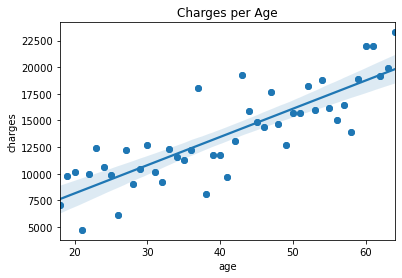

In [90]:
plt.scatter(data=mean_per_age, x='age', y='charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges per Age')
sns.regplot(data=mean_per_age, x='age', y='charges')

In [96]:
#2 How much, approximately charges increase by age (median)?

In [113]:
charges_median_per_age = df.groupby('age').charges.median().reset_index()

In [138]:
charges_median_per_age['difference'] = charges_median_per_age['charges'].diff()

In [154]:
charges_median_per_age = charges_median_per_age.apply(lambda x: round(x), axis=0)

In [168]:
charges_median_per_age.fillna(0, inplace=True)
charges_median_per_age.difference = charges_median_per_age.difference.cumsum()

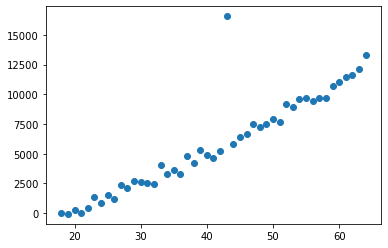

In [176]:
plt.scatter(
    data = charges_median_per_age, 
    x = 'age',
    y = 'difference'
)

In [177]:
#Who is the outlier and what is the pattern?

In [175]:
charges_median_per_age[(charges_median_per_age.age > 40) & (charges_median_per_age.age < 45)]

,age,charges,difference
23,41,6876.0,4678.0
24,42,7444.0,5246.0
25,43,18768.0,16570.0
26,44,8023.0,5825.0


In [204]:
df[df.charges == df[df.age == 43].charges.max()]

,age,sex,bmi,children,smoker,region,charges,weightStatus
549,43,female,46.2,0,yes,southeast,45863.205,obese


In [205]:
#Top 5 people that have greater charges

In [203]:
df[df.age == 43].sort_values(by='charges', ascending=False).head(5)

,age,sex,bmi,children,smoker,region,charges,weightStatus
549,43,female,46.20,0,yes,southeast,45863.2050,obese
665,43,male,38.06,2,yes,southeast,42560.4304,obese
312,43,male,35.97,3,yes,southeast,42124.5153,obese
958,43,male,34.96,1,yes,northeast,41034.2214,obese
1152,43,female,32.56,3,yes,southeast,40941.2854,obese


In [79]:
# Question 3
# How do insurance charges are correlated with sex?

In [83]:
mean_per_sex = df.groupby('sex').charges.mean().reset_index()

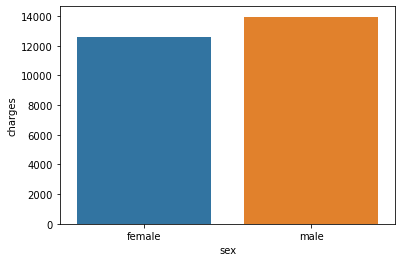

In [86]:
sns.barplot(data=mean_per_sex, x = 'sex', y = 'charges')